In [1]:
import numpy as np
import pandas as pd

In [2]:
def createSequnces(dataset, lookback=10):
    data = dataset.values
    dataX, dataY = [], []
    for i in range(len(data)-lookback):
        x = data[i:(i+lookback)]
        dataX.append(x)
        y = data[i+lookback]
        dataY.append(y)
    return dataX, dataY

def getBrokens(indice):
    broken_points = [0]
    for i, ts in enumerate(indice):
        if ts+1 not in indice:
            broken_points.append(i+1)
    broken_points.append(len(indice))
    return broken_points

def createDataset(dataset, lookback):
    X, Y = [], []
    broken_points = getBrokens(dataset.index)
    for i in range(len(broken_points)-1):
        x, y = createSequnces(dataset.iloc[broken_points[i]:broken_points[i+1], :], lookback)
        X += x
        Y += y
    return np.array(X), np.array(Y)

In [3]:
train = pd.read_csv('../train_treated.csv', index_col=0)
val = pd.read_csv('../val1_treated.csv', index_col=0)

In [4]:
lookback = 10
trainX, trainY = createDataset(train, lookback)
valX, valY = createDataset(val, lookback)

In [5]:
from keras.models import Sequential  
from keras.layers.core import Dense  
from keras.layers.recurrent import LSTM
from keras.callbacks import EarlyStopping
  
hidden_neurons = 30

model = Sequential()  
model.add(LSTM(hidden_neurons, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=False))  
model.add(Dense(trainY.shape[1], activation='linear'))  
model.compile(loss="mean_squared_error", optimizer="rmsprop") 

model.summary()

/home/sven/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 300)               376800    
_________________________________________________________________
dense_1 (Dense)              (None, 13)                3913      
Total params: 380,713
Trainable params: 380,713
Non-trainable params: 0
_________________________________________________________________


In [6]:
earlyStopping = EarlyStopping(monitor='val_loss', patience=3, mode='min')
history = model.fit(trainX,
          trainY,
          batch_size=450,
          epochs=100,
          verbose=1,
          validation_data=(valX, valY),
          callbacks=[earlyStopping])  

Train on 44750 samples, validate on 11117 samples
Epoch 1/100
44750/44750 [==============================] - 14s 303us/step - loss: 0.0188 - val_loss: 0.0155
Epoch 2/100
44750/44750 [==============================] - 11s 251us/step - loss: 0.0053 - val_loss: 0.0100
Epoch 3/100
44750/44750 [==============================] - 11s 254us/step - loss: 0.0035 - val_loss: 0.0078
Epoch 4/100
44750/44750 [==============================] - 11s 237us/step - loss: 0.0025 - val_loss: 0.0060
Epoch 5/100
44750/44750 [==============================] - 11s 242us/step - loss: 0.0021 - val_loss: 0.0058
Epoch 6/100
44750/44750 [==============================] - 11s 239us/step - loss: 0.0018 - val_loss: 0.0043
Epoch 7/100
44750/44750 [==============================] - 11s 240us/step - loss: 0.0016 - val_loss: 0.0043
Epoch 8/100
44750/44750 [==============================] - 11s 252us/step - loss: 0.0014 - val_loss: 0.0042
Epoch 9/100
44750/44750 [==============================] - 11s 240us/step - loss: 0.00

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

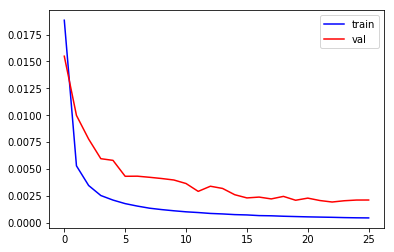

In [13]:
plt.figure()
plt.plot(history.history['loss'], color='b', label='train')
plt.plot(history.history['val_loss'], color='r', label='val')
plt.legend(loc='best')
plt.show()